# Download do dataset

In [ ]:
import kagglehub

# Download latest version
# Direct link: https://www.kaggle.com/datasets/subhajeetdas/iq-othnccd-lung-cancer-dataset-augmented/data
path = kagglehub.dataset_download("subhajeetdas/iq-othnccd-lung-cancer-dataset-augmented")

print("Path to dataset files:", path)

# Importando as Bibliotecas

In [95]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import os
import cv2

# Organizando o dataset

In [ ]:
# path = "para download manual configure o path do dataset"
bengin_path = path + r"/Augmented IQ-OTHNCCD lung cancer dataset/Benign cases"
malignant_path = path + r"/Augmented IQ-OTHNCCD lung cancer dataset/Malignant cases"
normal_path = path + r"/Augmented IQ-OTHNCCD lung cancer dataset/Normal cases"

img_classes = ["Benign cases", "Malignant cases", "Normal cases"]
path_list = [bengin_path, malignant_path, normal_path]

img_path = []
class_labels = []
counts = {"Benign cases": 0, "Malignant cases": 0, "Normal cases": 0}
for i, dir_list in enumerate(path_list):
    name_img = os.listdir(dir_list)
    for name_file in name_img:
        img = os.path.join(dir_list,name_file)
        img_path.append(img)
        class_labels.append(img_classes[i])
        counts[img_classes[i]] = counts[img_classes[i]] + 1

df = pd.DataFrame({"img_path" : img_path,
                  "label" : class_labels})

df.head()

,img_path,label
0,C:\Users\gmitoso\.cache\kagglehub\datasets\sub...,Benign cases
1,C:\Users\gmitoso\.cache\kagglehub\datasets\sub...,Benign cases
2,C:\Users\gmitoso\.cache\kagglehub\datasets\sub...,Benign cases
3,C:\Users\gmitoso\.cache\kagglehub\datasets\sub...,Benign cases
4,C:\Users\gmitoso\.cache\kagglehub\datasets\sub...,Benign cases


# Visualizando as imagens

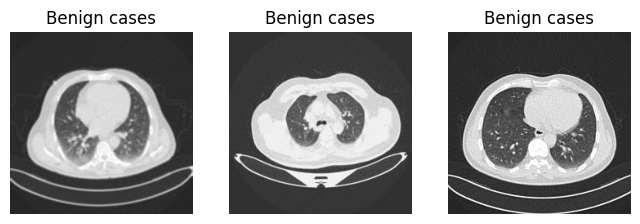

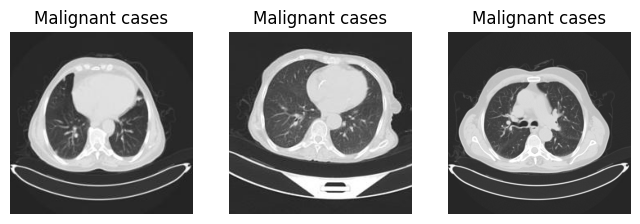

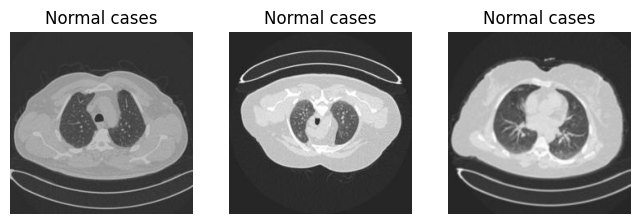

In [98]:
for category, group in df.groupby("label"):
    fig, ax = plt.subplots(1,3, figsize = (8,8))
    ax = ax.ravel()
    for i, (_,r) in enumerate(group.sample(3).iterrows()):
        img = cv2.imread(r.img_path)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title(r.label)
    plt.show()

# Explorando os dados

## Histograma

In [100]:
count_data = pd.DataFrame({
    "label": ["Benign", "Malignant", "Normal"],
    "count": [counts["Benign cases"], counts["Malignant cases"], counts["Normal cases"]]
})
# Histograma
fig = px.histogram(data_frame=count_data, x="label", y="count", color="label")
fig.show()

## Propriedade das imagens

In [101]:
sizes = []
resolutions = []
color_distributions = []

for img_path in df["img_path"]:
    #load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Get image size
    size = os.path.getsize(img_path)
    sizes.append(size)
    #Extract the resolution of images
    resolution = img.shape[:2]
    resolutions.append(resolution)
    #Extract color distribution
    mean_color_distributions = np.bincount(img.flatten(), minlength = 256)
    color_distributions.append(mean_color_distributions)
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

In [102]:
# Sizes in MB
sizes_MB = []
for img_path in df["img_path"]:
    img = cv2.imread(img_path)
    size = os.path.getsize(img_path)
    sizes_MB.append(size/1_000_000)

fig = px.histogram(x=sizes_MB, nbins = 50, title = "Tamanho das Imagens")
fig.update_layout(xaxis_title = "Tamanho (MB)",
                 yaxis_title = "Número de imagens",
                 showlegend = False,
                 bargap = 0.1,
                 bargroupgap = 0.1)
fig.update_traces(marker = dict(color = "green"))
fig.show()

In [103]:
fig = px.scatter(x = resolutions[:,0], y = resolutions[:,1], title = "Resolução das imagens")
fig.update_layout(
    xaxis_title = "Width (Pixel)",
    yaxis_title = "Height (Pixel)",
    showlegend = False,
    hovermode = "closest"
)
fig.update_traces(marker = dict(color="red"))
fig.show()

In [104]:
mean_color_distributions = np.mean(color_distributions, axis = 0)
fig = go.Figure(
    go.Bar(x = np.arange(256), y = mean_color_distributions, name = "Distribuição de cores"
))
fig.update_layout(
    title = "Média da distribuição de cores",
    xaxis_title = "Valores",
    yaxis_title = "Número de pixels"
)
fig.show()

# Carregando imagens

In [118]:
img_size = 224

def load_images_from_dir(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
            if img is not None:
                # Redimensiona imagens
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(label)
    return images, labels

In [119]:
benign_images, benign_labels = load_images_from_dir(bengin_path, label=0)  # label 0 para benign
malignant_images, malignant_labels = load_images_from_dir(malignant_path, label=1)  # label 1 para malignant
normal_images, normal_labels = load_images_from_dir(normal_path, label=2)  # label 2 para normal

In [120]:
from collections import Counter

images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels
images = np.array(images)
labels = np.array(labels)

print('Imagens:', len(images))
print('Labels:', Counter(labels))

Imagens: 3609
Labels: Counter({2: 1208, 1: 1201, 0: 1200})


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)
print(len(X_train), X_train.shape)
print(len(X_test), X_test.shape)

2887 (2887, 224, 224, 3)
722 (722, 224, 224, 3)


# Normalizando

In [122]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

In [123]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=8)
val_generator = val_datagen.flow(X_test, y_test, batch_size=8, shuffle= False)

# VGG16

In [124]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

base_model = VGG16(weights='imagenet', 
                            include_top=False, 
                            input_shape=(img_size,img_size,3),
                            classes=3)

base_model.trainable = False

# Create a new model on top of VGG16
vgg16_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax') 
])

vgg16_model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,787 (56.64 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [125]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = "val_loss",
                               patience = 5,
                               restore_best_weights = True)

vgg16_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = vgg16_model.fit(
    train_generator, 
    epochs= 50,
    validation_data=val_generator,
    callbacks=[
        early_stopping,
    ]
)

Epoch 1/50


c:\Users\gmitoso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



361/361 ━━━━━━━━━━━━━━━━━━━━ 358s 992ms/step - accuracy: 0.3518 - loss: 1.2233 - val_accuracy: 0.6122 - val_loss: 0.9677
Epoch 2/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 346s 960ms/step - accuracy: 0.4973 - loss: 0.9967 - val_accuracy: 0.6607 - val_loss: 0.8615
Epoch 3/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 295s 818ms/step - accuracy: 0.6073 - loss: 0.8729 - val_accuracy: 0.6662 - val_loss: 0.7874
Epoch 4/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 256s 710ms/step - accuracy: 0.6534 - loss: 0.7907 - val_accuracy: 0.7147 - val_loss: 0.7290
Epoch 5/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 262s 726ms/step - accuracy: 0.6755 - loss: 0.7418 - val_accuracy: 0.7244 - val_loss: 0.6847
Epoch 6/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 267s 740ms/step - accuracy: 0.6937 - loss: 0.7029 - val_accuracy: 0.7327 - val_loss: 0.6472
Epoch 7/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 264s 732ms/step - accuracy: 0.7226 - loss: 0.6492 - val_accuracy: 0.7438 - val_loss: 0.6122
Epoch 8/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 260s 721ms/step - accuracy: 0.7233 - loss: 0.63

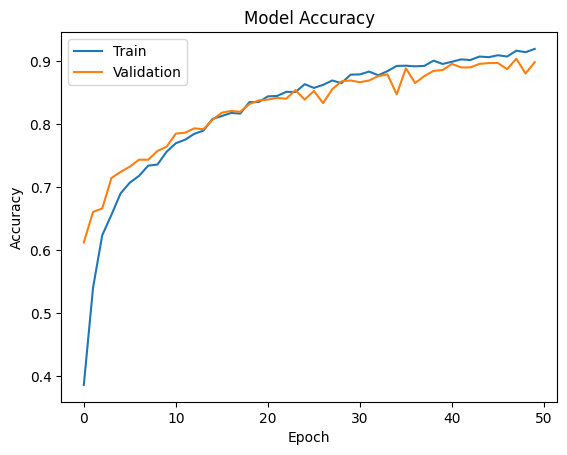

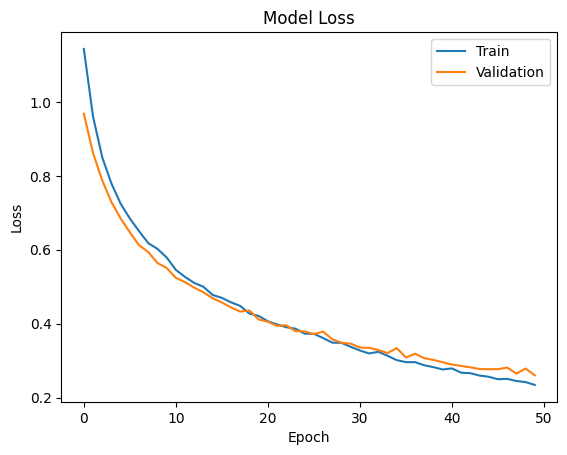

In [126]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = vgg16_model.predict(X_test / 255.0, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_bool, digits=4)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_bool)

print("\nConfusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(report)

23/23 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step

Confusion Matrix:
[[219   2  19]
 [  1 235   4]
 [ 40   7 195]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8423    0.9125    0.8760       240
           1     0.9631    0.9792    0.9711       240
           2     0.8945    0.8058    0.8478       242

    accuracy                         0.8989       722
   macro avg     0.9000    0.8992    0.8983       722
weighted avg     0.9000    0.8989    0.8982       722



# ResNet 152

In [132]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, models, optimizers

base_model = ResNet152V2(weights='imagenet', 
                            include_top=False, 
                            input_shape=(img_size,img_size,3),
                            classes=3)

base_model.trainable = False

# Create a new model on top of ResNet152V2
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax') 
])

resnet_model.summary()

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,856,963 (224.52 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [133]:
resnet_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = resnet_model.fit(
    train_generator, 
    epochs= 50,
    validation_data=val_generator,
    callbacks=[
        early_stopping,
    ]
)

Epoch 1/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.5259 - loss: 1.0866 - val_accuracy: 0.7853 - val_loss: 0.5101
Epoch 2/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 415s 1s/step - accuracy: 0.7795 - loss: 0.5157 - val_accuracy: 0.8421 - val_loss: 0.4090
Epoch 3/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.8358 - loss: 0.4074 - val_accuracy: 0.8712 - val_loss: 0.3464
Epoch 4/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.8635 - loss: 0.3370 - val_accuracy: 0.8864 - val_loss: 0.3120
Epoch 5/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.9055 - loss: 0.2696 - val_accuracy: 0.8850 - val_loss: 0.2760
Epoch 6/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.9274 - loss: 0.2111 - val_accuracy: 0.8961 - val_loss: 0.2492
Epoch 7/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.9289 - loss: 0.2054 - val_accuracy: 0.9141 - val_loss: 0.2320
Epoch 8/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.9481 - loss: 0.1574 - val_accu

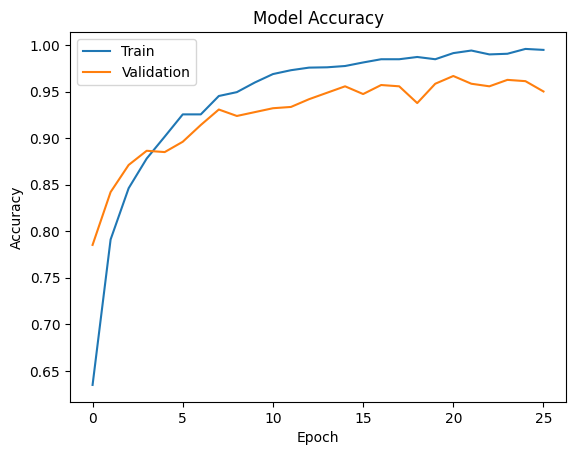

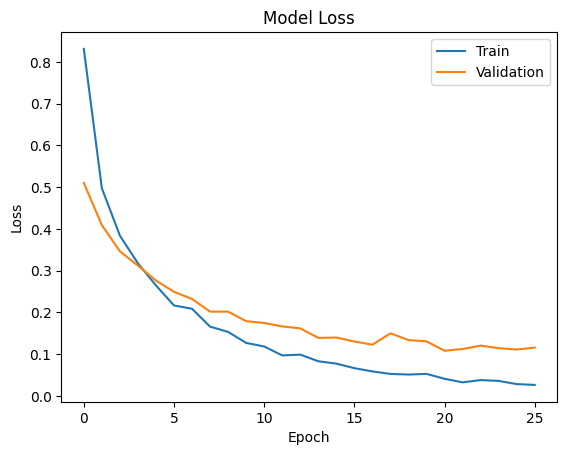

In [134]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [136]:
y_pred = resnet_model.predict(X_test / 255.0, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_bool, digits=4)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_bool)

print("\nConfusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(report)

23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step

Confusion Matrix:
[[232   4   4]
 [  2 237   1]
 [  8   5 229]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9587    0.9667    0.9627       240
           1     0.9634    0.9875    0.9753       240
           2     0.9786    0.9463    0.9622       242

    accuracy                         0.9668       722
   macro avg     0.9669    0.9668    0.9667       722
weighted avg     0.9669    0.9668    0.9667       722

